# Support Vector Regression (SVR)

## Importing the libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [40]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part 2 -  Regression/4. Support Vector Regression/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [41]:
print(X) # 2d data

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [42]:
print(y) # 1d data

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [43]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

Note ?

- we are not gonna using same scaler object for both matrix features X and dependent variable vector y.

- when you fit oject on sc(standard scaler) the data, while its going to compute the mean and standard deviation of that same variable.

- therefore we dont have the same mean and same standard deviation for our position levels and salaries.

- well obviously we have to create two standardscaler objects for to get feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [45]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [46]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [47]:
# SVR Overview or Summary. check the below link if you want learn indepth concepts
# https://medium.com/swlh/support-vector-regression-explained-for-beginners-2a8d14ba6e5d

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # rbf means radial basis function
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [48]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

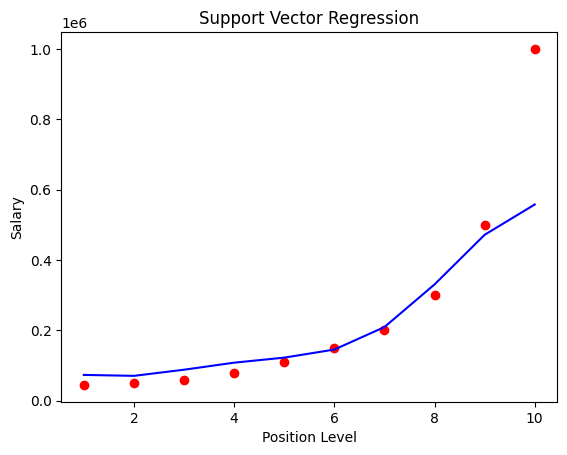

In [55]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) ,color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

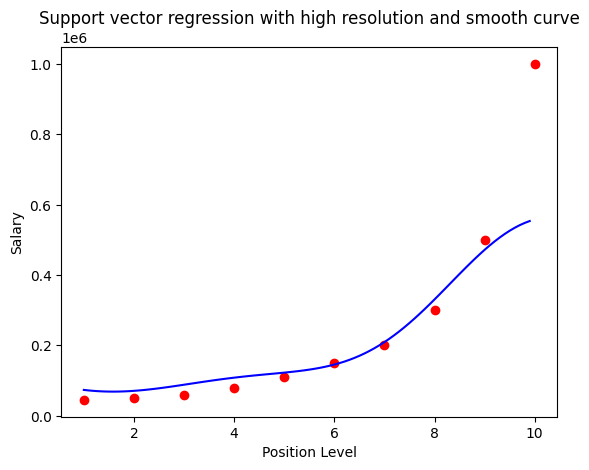

In [67]:
x_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(x_grid)).reshape(-1,1)),color='blue')
plt.title('Support vector regression with high resolution and smooth curve')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()